In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy.stats as stats

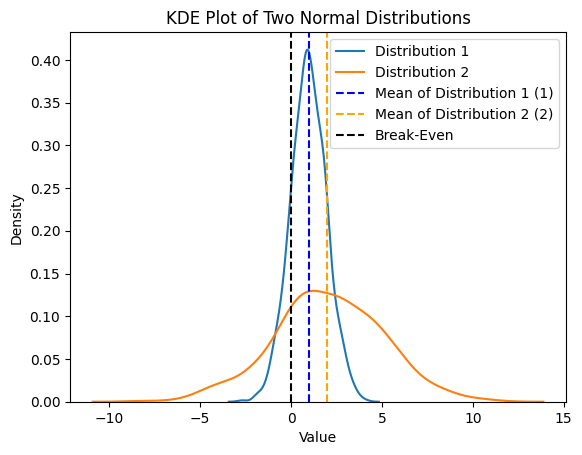

In [11]:


# Parameters for the normal distributions
mean1 = 1
std_dev1 = 1
num_samples1 = 1000

mean2 = 2
std_dev2 = 3
num_samples2 = 1000

# Generate the datasets
data1 = np.random.normal(mean1, std_dev1, num_samples1)
data2 = np.random.normal(mean2, std_dev2, num_samples2)

# Create DataFrames from the datasets
df1 = pd.DataFrame(data1, columns=['Value'])
df2 = pd.DataFrame(data2, columns=['Value'])

# Plot KDE for both distributions
sns.kdeplot(df1['Value'], label='Distribution 1')
sns.kdeplot(df2['Value'], label='Distribution 2')

# Plot lines showing the mean for both distributions
plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean of Distribution 1 ({mean1})')
plt.axvline(mean2, color='orange', linestyle='--', label=f'Mean of Distribution 2 ({mean2})')
plt.axvline(0, color='Black', linestyle='--', label='Break-Even')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot of Two Normal Distributions')
plt.legend()

# Show plot
plt.show()


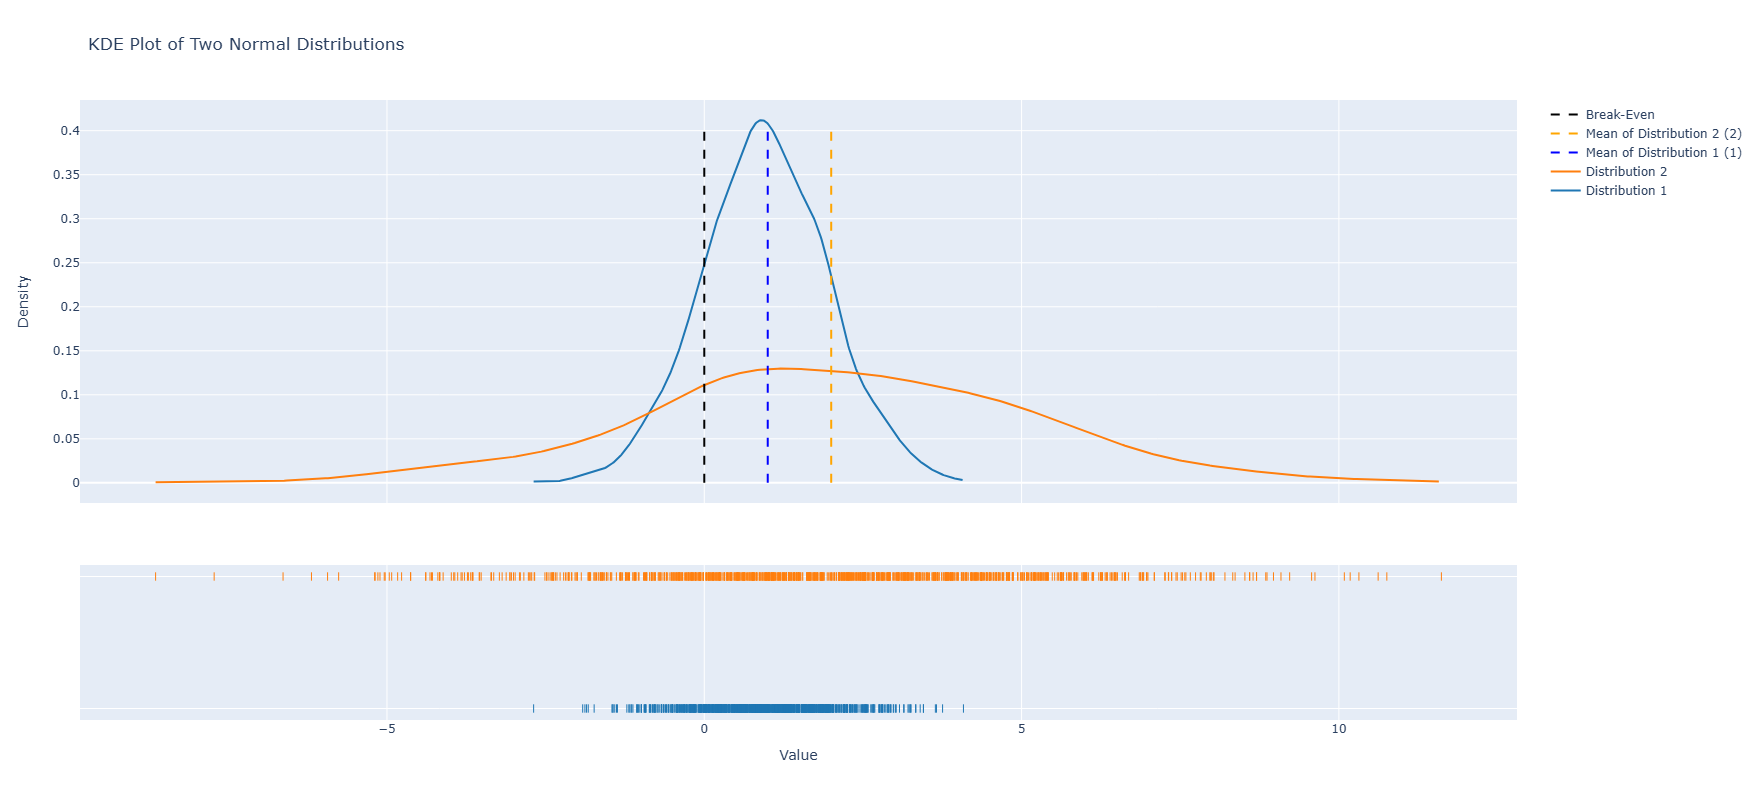

In [12]:
# Create KDE plot
fig = ff.create_distplot([data1, data2], group_labels=['Distribution 1', 'Distribution 2'], show_hist=False)

# Add vertical lines for means and break-even
fig.add_trace(go.Scatter(x=[mean1, mean1], y=[0, 0.4], mode='lines', name=f'Mean of Distribution 1 ({mean1})', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=[mean2, mean2], y=[0, 0.4], mode='lines', name=f'Mean of Distribution 2 ({mean2})', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=[0, 0], y=[0, 0.4], mode='lines', name='Break-Even', line=dict(color='black', dash='dash')))

# Customize layout
fig.update_layout(title='KDE Plot of Two Normal Distributions', xaxis_title='Value', yaxis_title='Density')
fig.update_layout(height=800)
# Show plot
fig.show()


In [13]:
from scipy.stats import norm

# Compute probabilities
prob1 = norm.cdf(0, loc=mean1, scale=std_dev1)
prob2 = norm.cdf(0, loc=mean2, scale=std_dev2)

print(f"Probability of X < 0 for Distribution 1: {prob1:.4f}")
print(f"Probability of X < 0 for Distribution 2: {prob2:.4f}")


Probability of X < 0 for Distribution 1: 0.1587
Probability of X < 0 for Distribution 2: 0.2525


In [14]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(data1, data2)
print(f"F-statistic: {f_stat:.4f}, P-value: {round(p_value, 2)}")

F-statistic: 119.4056, P-value: 0.0


In [15]:
# Compute lift
lift = ((mean2 - mean1) / mean1) * 100
print(f"Lift: {lift:.2f}%")

Lift: 100.00%


In [16]:
from scipy.stats import levene

stat, p = levene(df1['Value'], df2['Value'])
print(f"Levene’s test p-value: {p}")

Levene’s test p-value: 2.34980792548592e-133


In [8]:
from scipy.stats import ttest_ind

# Welch’s t-test (more robust, doesn't assume equal variances)
t_stat, p_val = ttest_ind(df1['Value'], df2['Value'], equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: -11.699384991056219, p-value: 4.7217761941204936e-30
